In [1]:
import os
import zipfile
from io import StringIO
import csv
import pandas as pd
import numpy as np

import plotly.plotly as py


%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sessions = pd.read_csv(os.path.expanduser("~/USF/adv_ml/final/sessions_short.csv"))

In [3]:
sessions.to_feather("/tmp/sessions_short")

In [4]:
sessions_df = pd.read_feather("/tmp/sessions_short")

/anaconda3/lib/python3.6/site-packages/pandas/io/feather_format.py:112: FutureWarning:

`nthreads` argument is deprecated, pass `use_threads` instead



In [5]:
sessions_df.shape

(6239836, 21)

In [6]:
sessions_df =sessions_df[(sessions_df.is_session == 1) & (sessions_df.is_wau == 0) & \
               (sessions_df.is_mau == 0)& (sessions_df.is_developer == 0)]
             

In [7]:
sessions_df.head()

,app_id,session_id,start_timestamp,timezone,previous_sessions_duration,user_created_timestamp,is_user_first_session,is_session,is_developer,is_wau,...,country,region,city,latitude,longitude,locale,os_name,session_index,device_id,user_id_hash
0,4724682771660800,5558845121177764917,1542215364580,Asia/Manila,25837591,1538874289458,0,1,0,0,...,PH,00,makati,14.555,121.00,en_GB,Android OS,30,546a3d98-d540-4e72-ad82-9ebd64e0839b,0
1,4724682771660800,2201961907282901522,1543712977293,Asia/Manila,35050130,1538874289458,0,1,0,0,...,PH,00,quezon city,14.680,121.06,en_GB,Android OS,47,546a3d98-d540-4e72-ad82-9ebd64e0839b,0
2,4724682771660800,18781111175537580,1539215568666,Asia/Manila,11343848,1538874289458,0,1,0,0,...,PH,00,makati,14.555,121.00,en_GB,Android OS,10,546a3d98-d540-4e72-ad82-9ebd64e0839b,0
3,4724682771660800,1477540082628742048,1540120743010,Asia/Manila,13499724,1538874289458,0,1,0,0,...,PH,11,davao city,7.190,125.44,en_GB,Android OS,13,546a3d98-d540-4e72-ad82-9ebd64e0839b,0
4,4724682771660800,8184875317380844086,1542671625528,Asia/Manila,32788010,1538874289458,0,1,0,0,...,PH,00,makati,14.555,121.00,en_GB,Android OS,41,546a3d98-d540-4e72-ad82-9ebd64e0839b,0


In [8]:
sessions_df.shape

(5165760, 21)

IDEAS:
BY sessions
- sessions by country
- prevalent os type

#### By User:
- n sessions
- first session or not
- prevalent os type

### Explore gographical allocation

In [9]:
countries = sessions_df['country'].value_counts().sort_values(ascending = False)

countries = countries.to_frame()

countries.columns = ['n_sessions']

countries['country']= countries.index

countries.head()

,n_sessions,country
US,2382588,US
IN,401404,IN
GB,373924,GB
PH,207779,PH
CA,158324,CA


No handles with labels found to put in legend.


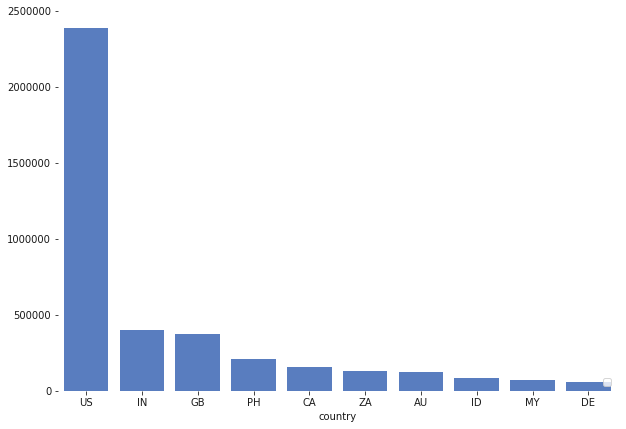

In [10]:

f, ax = plt.subplots(figsize=(10,7))
sns.set_color_codes("muted")
sns.barplot(x="country", y="n_sessions", data=countries[:10],
            label="", color="b")


# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="country")
sns.despine(left=True, bottom=True)

###  Sessions by OS type

In [11]:
sessions_df['os_name'].value_counts()

Android OS    3360443
iOS           1766226
iPhone OS       39083
Name: os_name, dtype: int64

In [12]:
d = {'iPhone OS' : 'iOS', 'iOS' : 'iOS','Android OS': 'Android OS' }
sessions_df['os_name'] = sessions_df['os_name'].map(d)
sessions_df['os_name'].value_counts()

Android OS    3360443
iOS           1805309
Name: os_name, dtype: int64

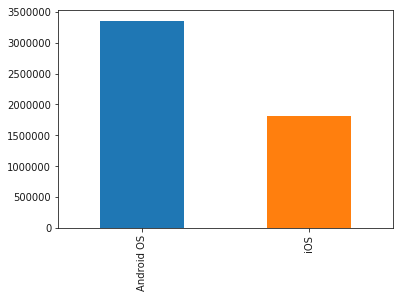

In [13]:
sessions_df['os_name'].value_counts().plot(kind = 'bar');

### Previous session duration 

In [14]:
sessions_df['prev_ses_dur_hour'] = sessions_df['previous_sessions_duration']/3600000

In [26]:
# Previous session duration in hours:
#Mean
print(f'Average past session duration in hours: {round(sessions_df["prev_ses_dur_hour"].mean())}')
print(f'Median past session duration in hours: {round(sessions_df["prev_ses_dur_hour"].median())}')

Average past session duration in hours: 12
Median past session duration in hours: 4


/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



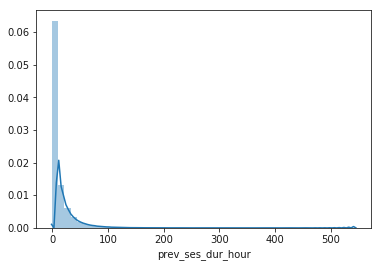

In [16]:
sns.distplot(sessions_df['prev_ses_dur_hour'])

In [17]:
# Sessions duration in hours quantiles
sessions_df['prev_ses_dur_hour'].quantile(np.linspace(.1, 1, 9, 0), 'lower')


0.1     0.000000
0.2     0.572179
0.3     1.407234
0.4     2.620623
0.5     4.431412
0.6     7.192377
0.7    11.407999
0.8    18.317300
0.9    32.514618
Name: prev_ses_dur_hour, dtype: float64

In [37]:
timezones = sessions_df.groupby(['timezone'])['prev_ses_dur_hour'].mean().sort_values(ascending = False).to_frame()


In [38]:
timezones['timezone'] = timezones.index

In [52]:
top_50_tz_by_duration= timezones[:50]

In [53]:
top_50_tz_by_duration.head()

,prev_ses_dur_hour,timezone
timezone,,
America/Fortaleza,98.925712,America/Fortaleza
America/Louisville,97.420186,America/Louisville
Asia/Chita,70.420581,Asia/Chita
America/Costa_Rica,48.642521,America/Costa_Rica
Africa/Ceuta,39.234351,Africa/Ceuta


In [55]:
top_50_tz_by_duration['city'] = top_50_tz_by_duration['timezone'].apply(lambda x: str(x).split('/')[1])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



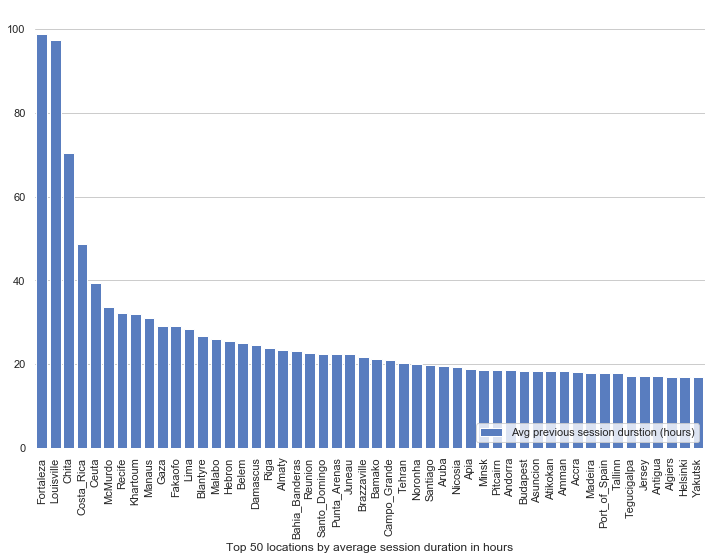

In [65]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Plot the total crashes
sns.set_color_codes("muted")
sns.barplot(x="city", y="prev_ses_dur_hour", data=top_50_tz_by_duration,
            label="Avg previous session durstion (hours)", color="b")



# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set_xticklabels(labels =top_50_tz_by_duration['city'], rotation=90)

ax.set(ylabel="",
       xlabel="Top 50 locations by average session duration in hours")
sns.despine(left=True, bottom=True)

### By user

In [66]:
sessions_df.head()

,app_id,session_id,start_timestamp,timezone,previous_sessions_duration,user_created_timestamp,is_user_first_session,is_session,is_developer,is_wau,...,region,city,latitude,longitude,locale,os_name,session_index,device_id,user_id_hash,prev_ses_dur_hour
0,4724682771660800,5558845121177764917,1542215364580,Asia/Manila,25837591,1538874289458,0,1,0,0,...,00,makati,14.555,121.00,en_GB,Android OS,30,546a3d98-d540-4e72-ad82-9ebd64e0839b,0,7.177109
1,4724682771660800,2201961907282901522,1543712977293,Asia/Manila,35050130,1538874289458,0,1,0,0,...,00,quezon city,14.680,121.06,en_GB,Android OS,47,546a3d98-d540-4e72-ad82-9ebd64e0839b,0,9.736147
2,4724682771660800,18781111175537580,1539215568666,Asia/Manila,11343848,1538874289458,0,1,0,0,...,00,makati,14.555,121.00,en_GB,Android OS,10,546a3d98-d540-4e72-ad82-9ebd64e0839b,0,3.151069
3,4724682771660800,1477540082628742048,1540120743010,Asia/Manila,13499724,1538874289458,0,1,0,0,...,11,davao city,7.190,125.44,en_GB,Android OS,13,546a3d98-d540-4e72-ad82-9ebd64e0839b,0,3.749923
4,4724682771660800,8184875317380844086,1542671625528,Asia/Manila,32788010,1538874289458,0,1,0,0,...,00,makati,14.555,121.00,en_GB,Android OS,41,546a3d98-d540-4e72-ad82-9ebd64e0839b,0,9.107781


In [71]:
f"Average number of sessions per user is equal to {round(sessions_df.groupby(['user_id_hash'])['session_id'].count().mean())}"


'Average number of sessions per user is equal to 8'

In [82]:
f"Average duration of past sessions per user is equal to {round(sessions_df.groupby(['user_id_hash'])['prev_ses_dur_hour'].median().median(),3)} hours"



'Average duration of past sessions per user is equal to 0.015 minutes'

/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



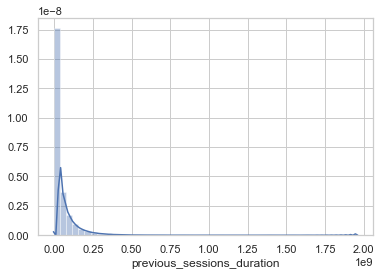

In [84]:
sns.distplot(sessions_df['previous_sessions_duration'])

In [89]:
user_ses_dur = sessions_df.groupby(['user_id_hash'])['previous_sessions_duration'].mean().to_frame()

In [96]:
# Percentage of users with nonzero avg previous session duration
user_ses_dur[user_ses_dur['previous_sessions_duration']>0].count()/user_ses_dur.shape[0]*100

previous_sessions_duration    54.003832
dtype: float64

In [97]:
 user_first_session = sessions_df.groupby(['user_id_hash'])['is_user_first_session'].mean().to_frame()

In [103]:
# Percentage of users who had first session 
user_first_session[user_first_session['is_user_first_session']==1].count()/user_first_session.shape[0]*100

is_user_first_session    45.032194
dtype: float64

In [125]:
sessions_user = sessions_df.drop(['app_id', 'session_id', 'start_timestamp','previous_sessions_duration',\
                                 'user_created_timestamp', 'is_developer', 'is_wau', 'is_mau', 'session_index',\
                                  'latitude', 'longitude', 'prev_ses_dur_hour', 'is_user_first_session',
                                 'locale', 'city'], axis =1)

In [126]:
sessions_user.head()

,timezone,is_session,country,region,os_name,device_id,user_id_hash
0,Asia/Manila,1,PH,00,Android OS,546a3d98-d540-4e72-ad82-9ebd64e0839b,0
1,Asia/Manila,1,PH,00,Android OS,546a3d98-d540-4e72-ad82-9ebd64e0839b,0
2,Asia/Manila,1,PH,00,Android OS,546a3d98-d540-4e72-ad82-9ebd64e0839b,0
3,Asia/Manila,1,PH,11,Android OS,546a3d98-d540-4e72-ad82-9ebd64e0839b,0
4,Asia/Manila,1,PH,00,Android OS,546a3d98-d540-4e72-ad82-9ebd64e0839b,0


In [127]:
sessions_user.shape

(5165760, 7)

In [128]:
sessions_user.drop_duplicates(inplace = True)

In [129]:
sessions_user.shape

(726280, 7)

In [140]:
# Numnber of devices per user (quantiles)
sessions_user.groupby(['user_id_hash'])['device_id'].count().quantile(np.linspace(.1, 1, 9, 0))

0.1    1.0
0.2    1.0
0.3    1.0
0.4    1.0
0.5    1.0
0.6    1.0
0.7    1.0
0.8    1.0
0.9    2.0
Name: device_id, dtype: float64

In [144]:
print(f"Median number of devices per user: {sessions_user.groupby(['user_id_hash'])['device_id'].count().median()}")
print(f"Max number of devices per user: {sessions_user.groupby(['user_id_hash'])['device_id'].count().max()}")
     

Median number of devices per user: 1.0
Max number of devices per user: 43


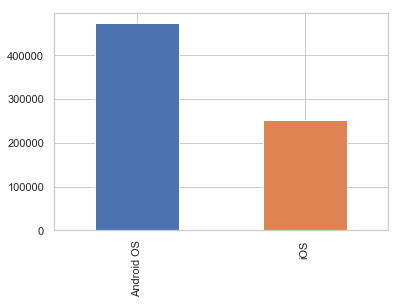

In [146]:
sessions_user['os_name'].value_counts().plot(kind = 'bar');

In [148]:
sessions_user.head()

,timezone,is_session,country,region,os_name,device_id,user_id_hash
0,Asia/Manila,1,PH,00,Android OS,546a3d98-d540-4e72-ad82-9ebd64e0839b,0
3,Asia/Manila,1,PH,11,Android OS,546a3d98-d540-4e72-ad82-9ebd64e0839b,0
49,Europe/London,1,GB,eng,iOS,B3AD9B36-0838-4D14-9D5D-2F108FE8D9DC,1
52,America/New_York,1,US,ga,iOS,6641BD28-AEE2-40DE-BDE2-8546EDA4A175,2
54,Asia/Kolkata,1,IN,as,Android OS,d931db62-1431-4abf-9a4a-b3958a025a53,3


In [156]:
region_user = sessions_user.drop(['os_name', 'device_id', 'region', 'is_session'], axis= 1)

In [157]:
region_user.drop_duplicates(inplace=True)

In [158]:
region_user

(633500, 3)

In [ ]:
region_user

TypeError: must be str, not NoneType

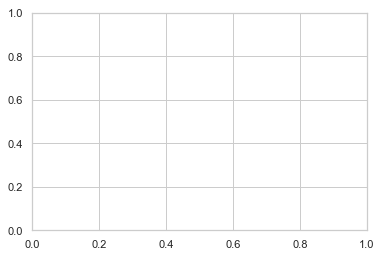

In [159]:
sns.distplot(region_user['country'])

In [15]:
aggregations = {
    '':'sum',
    'date': lambda x: max(x) - 1
}

,app_id,session_id,start_timestamp,timezone,previous_sessions_duration,user_created_timestamp,is_user_first_session,is_session,is_developer,is_wau,...,country,region,city,latitude,longitude,locale,os_name,session_index,device_id,user_id_hash
0,4724682771660800,5558845121177764917,1542215364580,Asia/Manila,25837591,1538874289458,0,1,0,0,...,PH,00,makati,14.555,121.000,en_GB,Android OS,30,546a3d98-d540-4e72-ad82-9ebd64e0839b,0
1,4724682771660800,2201961907282901522,1543712977293,Asia/Manila,35050130,1538874289458,0,1,0,0,...,PH,00,quezon city,14.680,121.060,en_GB,Android OS,47,546a3d98-d540-4e72-ad82-9ebd64e0839b,0
2,4724682771660800,18781111175537580,1539215568666,Asia/Manila,11343848,1538874289458,0,1,0,0,...,PH,00,makati,14.555,121.000,en_GB,Android OS,10,546a3d98-d540-4e72-ad82-9ebd64e0839b,0
3,4724682771660800,1477540082628742048,1540120743010,Asia/Manila,13499724,1538874289458,0,1,0,0,...,PH,11,davao city,7.190,125.440,en_GB,Android OS,13,546a3d98-d540-4e72-ad82-9ebd64e0839b,0
4,4724682771660800,8184875317380844086,1542671625528,Asia/Manila,32788010,1538874289458,0,1,0,0,...,PH,00,makati,14.555,121.000,en_GB,Android OS,41,546a3d98-d540-4e72-ad82-9ebd64e0839b,0
49,4724682771660800,3911278647231629291,1541886003916,Europe/London,0,1541886003916,1,1,0,0,...,GB,eng,sunderland,54.900,-1.384,en-GB_GB,iOS,1,B3AD9B36-0838-4D14-9D5D-2F108FE8D9DC,1
50,4724682771660800,1187115534782274181,1541894377049,Europe/London,3037408,1541886003916,0,1,0,0,...,GB,eng,sunderland,54.900,-1.384,en-GB_GB,iOS,2,B3AD9B36-0838-4D14-9D5D-2F108FE8D9DC,1
51,4724682771660800,4933407100084709500,1541928908015,Europe/London,3037408,1541886003916,0,1,0,0,...,GB,eng,sunderland,54.900,-1.384,en-GB_GB,iOS,3,B3AD9B36-0838-4D14-9D5D-2F108FE8D9DC,1
52,4724682771660800,5287488938902355734,1539830331932,America/New_York,0,1539830331932,1,1,0,0,...,US,ga,calhoun,34.500,-84.940,en-US_US,iOS,1,6641BD28-AEE2-40DE-BDE2-8546EDA4A175,2
53,4724682771660800,6272038597000850083,1542880689345,Asia/Kolkata,596967,1542523017562,1,0,0,0,...,IN,as,guwahati,26.140,91.750,en_GB,Android OS,1,d931db62-1431-4abf-9a4a-b3958a025a53,3
